## Importing libraries

In [1]:
!pip install pyarrow

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading datasets

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

building_data = pd.read_csv('building_metadata.csv')

weather_train_data = pd.read_csv('weather_train.csv')
weather_test_data = pd.read_csv('weather_test.csv')

## Data viewing

In [4]:
train_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [5]:
train_data.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [7]:
test_data.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [8]:
building_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [9]:
weather_train_data.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [10]:
weather_test_data.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6


In [11]:
print('Shape of Train Data:',train_data.shape)
print('Shape of Test Data:', test_data.shape)
print('Shape of Building Data:', building_data.shape)
print('Shape of Weather Train Data:', weather_train_data.shape)
print('Shape of Weather Test Data:', weather_test_data.shape)

Shape of Train Data: (20216100, 4)
Shape of Test Data: (41697600, 4)
Shape of Building Data: (1449, 6)
Shape of Weather Train Data: (139773, 9)
Shape of Weather Test Data: (277243, 9)


## Converting csv to feather format 

In [12]:
train_data.to_feather('train_data.feather')
test_data.to_feather('test_data.feather')

building_data.to_feather('building_data.feather')

weather_train_data.to_feather('weather_train_data.feather')
weather_test_data.to_feather('weather_test_data.feather')


In [13]:
train_data = pd.read_feather('train_data.feather')
test_data = pd.read_feather('test_data.feather')

building_data = pd.read_feather('building_data.feather')

weather_train_data = pd.read_feather('weather_train_data.feather')
weather_test_data = pd.read_feather('weather_test_data.feather')


## Reducing memory usage of the dataset

In [14]:
def reduce_mem_usage(df, df_name):

    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:

        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2

    print('Memory usage of {} is reduced by {:.2f} %. Usage dropped from {:.2f} MB to {:.2f} MB.'.format(df_name, (100 * (start_mem - end_mem) / start_mem), start_mem, end_mem))
    
    return df


In [15]:
train_data = reduce_mem_usage(train_data, 'Train Data')
test_data = reduce_mem_usage(test_data, 'Test Data')

building_data = reduce_mem_usage(building_data, 'Building Data')

weather_train_data = reduce_mem_usage(weather_train_data, 'Weather Train Data')
weather_test_data = reduce_mem_usage(weather_test_data, 'Weather Test Data')

Memory usage of Train Data is reduced by 71.82 %. Usage dropped from 616.95 MB to 173.84 MB.
Memory usage of Test Data is reduced by 71.82 %. Usage dropped from 1272.51 MB to 358.53 MB.
Memory usage of Building Data is reduced by 73.88 %. Usage dropped from 0.07 MB to 0.02 MB.
Memory usage of Weather Train Data is reduced by 73.06 %. Usage dropped from 9.60 MB to 2.59 MB.
Memory usage of Weather Test Data is reduced by 73.04 %. Usage dropped from 19.04 MB to 5.13 MB.


## Merging Data

In [3]:
train = train_data.merge(building_data, on='building_id', how='left')
train = train.merge(weather_train_data, on=['site_id', 'timestamp'], how='left')

In [4]:
test = test_data.merge(building_data, on='building_id', how='left')
test = test.merge(weather_test_data, on=['site_id', 'timestamp'], how='left')

In [18]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [19]:
test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609


In [20]:
print('Shape of Combined Train Data:',train.shape)
print('Shape of Combined Test Data:', test.shape)

Shape of Combined Train Data: (20216100, 16)
Shape of Combined Test Data: (41697600, 16)


## Breaking Timestamp 

In [21]:
# Breaking down into 6 new columns: hour, day, dayOfWeek, dayOfYear, month and year

def breakdown_timestamp(dataframe):
    
    dataframe['timestamp']= pd.to_datetime(dataframe['timestamp'])

    dataframe['hour']= np.uint8(dataframe['timestamp'].dt.hour)
    
    dataframe['day']= np.uint16(dataframe['timestamp'].dt.day)
    dataframe['dayofweek']= np.uint8(dataframe['timestamp'].dt.dayofweek)
    dataframe['dayofyear']= np.uint16(dataframe['timestamp'].dt.dayofyear)

    dataframe['month']= np.uint8(dataframe['timestamp'].dt.month)

    dataframe['year']= np.uint16(dataframe['timestamp'].dt.year)
    
    return dataframe

In [22]:
train = breakdown_timestamp(train)
test = breakdown_timestamp(test)

In [23]:
print('New Shape of Train Data:',train.shape)
print('New Shape of Test Data:', test.shape)

New Shape of Train Data: (20216100, 22)
New Shape of Test Data: (41697600, 22)


##  Check For Missing Values

In [36]:
missing_values = pd.DataFrame(train.isnull().sum() * 100 / len(train))
missing_values.columns = ["Missing Values"]

missing_values = missing_values[missing_values["Missing Values"] != 0]
missing_values.sort_values(by = "Missing Values", axis = 0, ascending = False, inplace = True)

missing_values

,Missing Values
floor_count,82.652772
year_built,59.990033
cloud_coverage,43.655131
precip_depth_1_hr,18.544739
wind_direction,7.167792
sea_level_pressure,6.092515
wind_speed,0.710701
dew_temperature,0.495348
air_temperature,0.478124


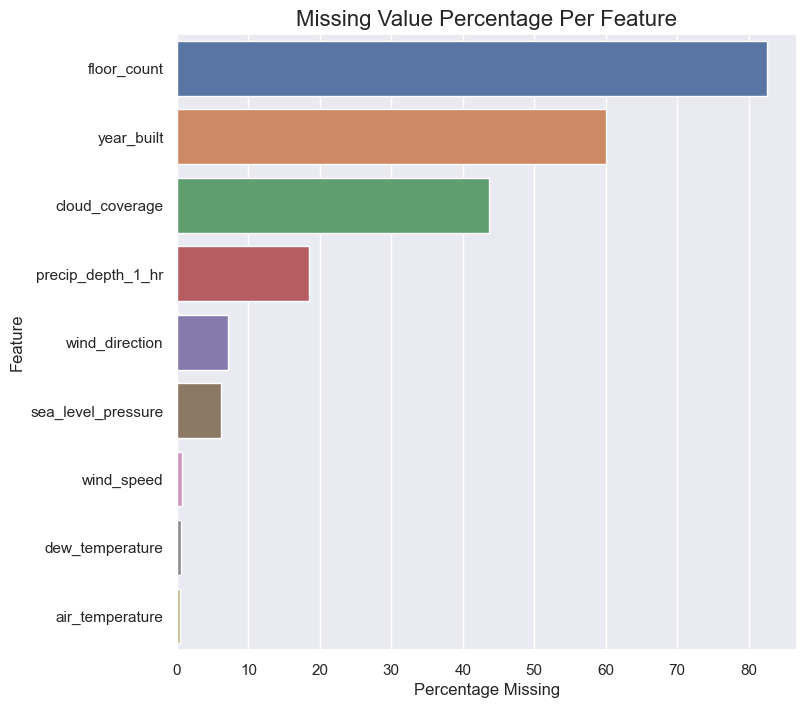

In [37]:
plt.figure(figsize=(8,8))
sns.barplot(x = missing_values['Missing Values'], y = missing_values.index).set_title("Missing Value Percentage Per Feature", fontsize=16)
plt.xlabel('Percentage Missing', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [8]:
empty_per_row = train.isnull().sum(axis=1)
train['empty_count'] = empty_per_row
empty_count = empty_per_row.value_counts()
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,No_Of_Empty,empty_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,2
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,2
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,2
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,2
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,2


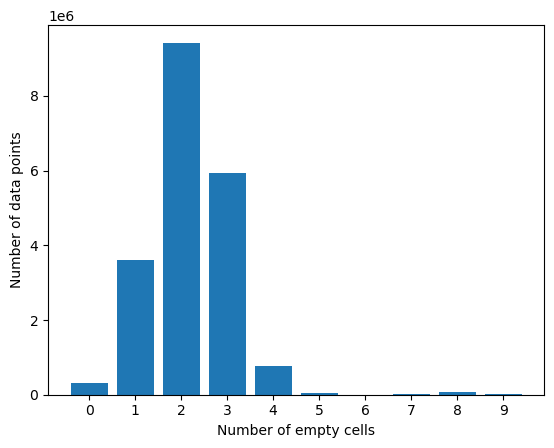

In [10]:
plt.bar(empty_count.index, empty_count.values)
plt.xlabel('Number of empty cells')
plt.ylabel('Number of data points')
plt.xticks(empty_count.index)
plt.show()

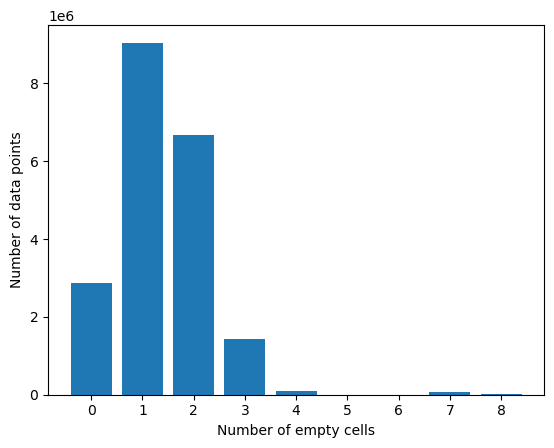

In [13]:
del train['floor_count']
empty_per_row = train.isnull().sum(axis=1)
train['empty_count'] = empty_per_row
empty_count = empty_per_row.value_counts()
plt.bar(empty_count.index, empty_count.values)
plt.xlabel('Number of empty cells')
plt.ylabel('Number of data points')
plt.xticks(empty_count.index)
plt.show()

In [25]:
medians = train.median()
print(medians)
exclude = ['timestamp', 'primary_use']

for column in train.columns:
    if column not in exclude:
        train[column].fillna(medians[column], inplace = True) 

C:\Users\PC\AppData\Local\Temp\ipykernel_3304\642111964.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = train.median()


building_id             895.000
meter                     0.000
meter_reading            78.775
site_id                   9.000
square_feet           72709.000
year_built             1969.000
air_temperature          16.700
cloud_coverage            0.000
dew_temperature           8.900
precip_depth_1_hr         0.000
sea_level_pressure     1016.000
wind_direction          180.000
wind_speed                3.100
No_Of_Empty               0.000
empty_count               1.000
dtype: float64


## Target Variable: 'Meter Reading'

In [24]:
sns.set_theme()

def draw_distribution_graph(dataframe, column_name):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.distplot(dataframe[column_name], color='purple', ax = ax).set_title("Distribution Graph for {}".format(column_name), fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12644\700102675.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[column_name], color='purple', ax = ax).set_title("Distribution Graph for {}".format(column_name), fontsize=16)


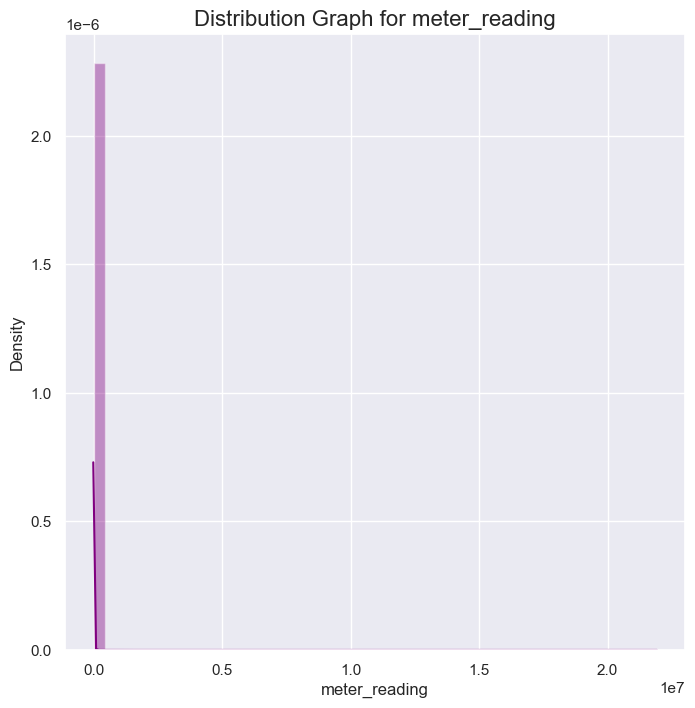

In [25]:
draw_distribution_graph(train, 'meter_reading')

In [26]:
print('Meter Reading has a skewness of', train['meter_reading'].skew())

Meter Reading has a skewness of 104.81131


In [27]:
train['meter_reading']=np.log1p(train['meter_reading'])

C:\Users\PC\AppData\Local\Temp\ipykernel_12644\700102675.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[column_name], color='purple', ax = ax).set_title("Distribution Graph for {}".format(column_name), fontsize=16)


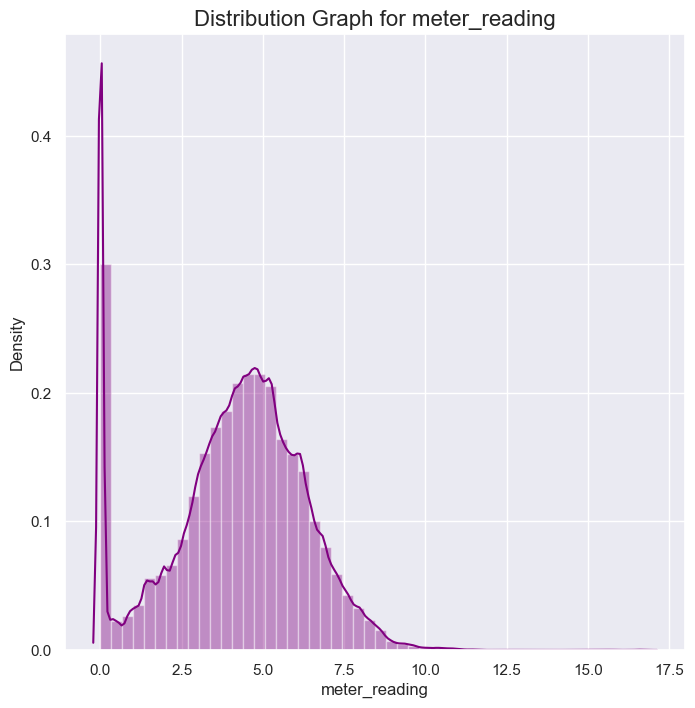

In [28]:
draw_distribution_graph(train, 'meter_reading')

In [29]:
print('Meter Reading has a new skewness of', train['meter_reading'].skew())

Meter Reading has a new skewness of -0.27537704


## Average Readings per Hour and Month

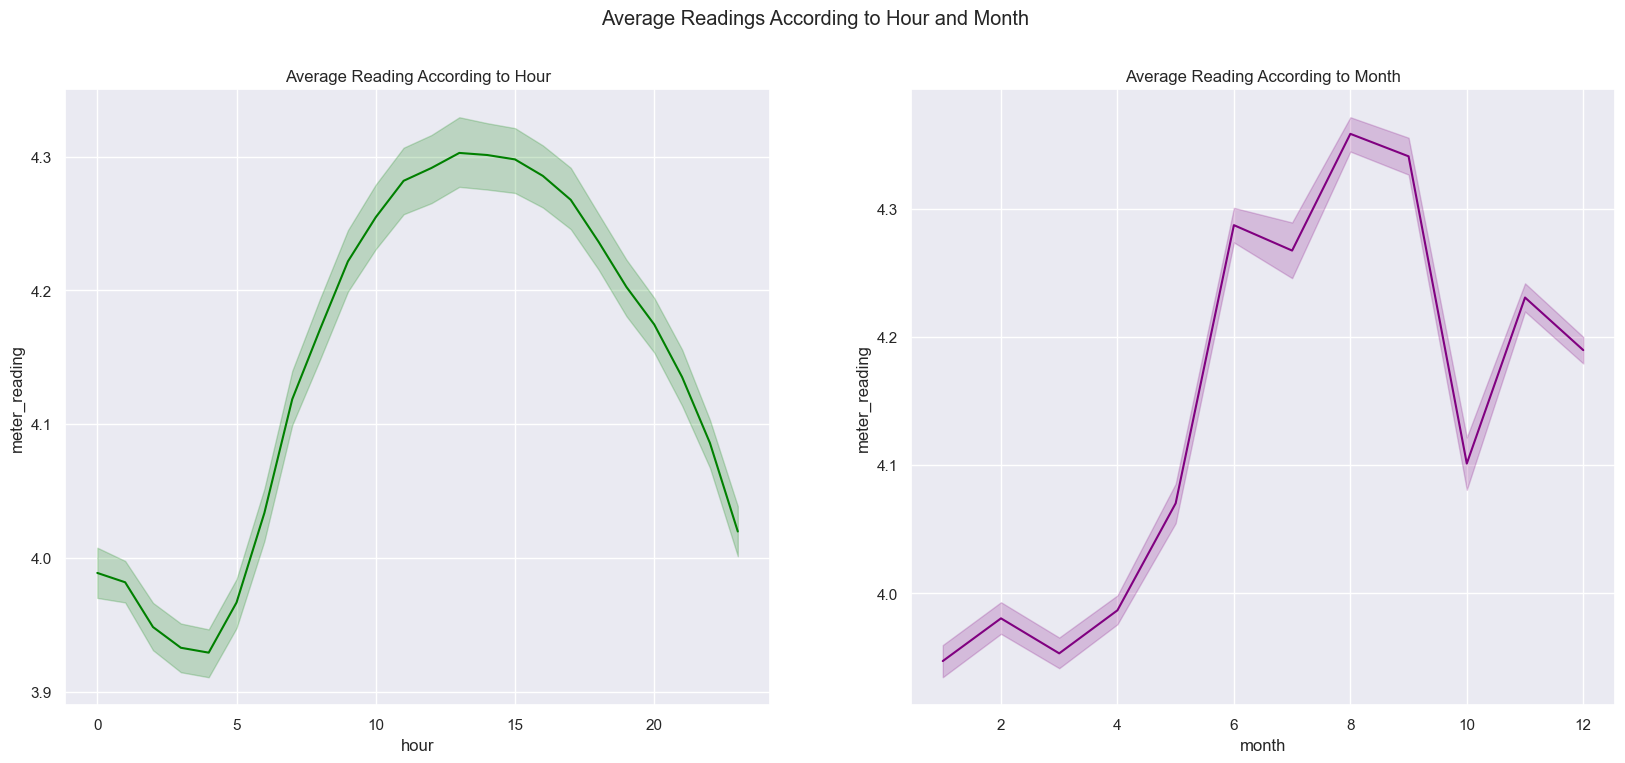

In [34]:
hour_groups = train.groupby(['timestamp','hour']).meter_reading.mean().reset_index()
month_groups = train.groupby(['timestamp','month']).meter_reading.mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
fig.suptitle('Average Readings According to Hour and Month')

sns.lineplot(x = hour_groups['hour'], y = hour_groups['meter_reading'], color='green', ax = ax1)
ax1.set_title('Average Reading According to Hour')


sns.lineplot(x = month_groups['month'], y = month_groups['meter_reading'], color='purple', ax = ax2)
ax2.set_title('Average Reading According to Month')

plt.show()

##  Average Readings per Building

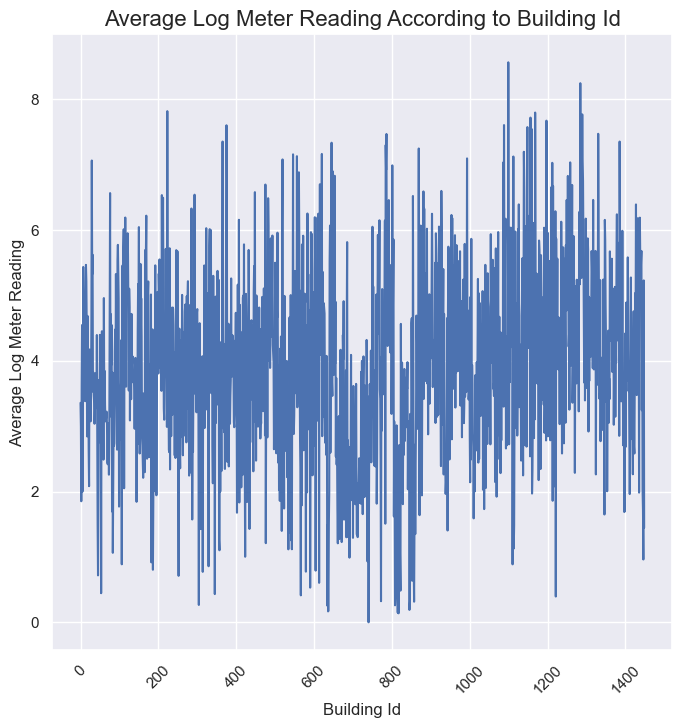

In [35]:
building_groups = train.groupby(['building_id']).meter_reading.mean().reset_index()

plt.figure(figsize=(8,8))
sns.lineplot(x = building_groups['building_id'], y = building_groups.meter_reading).set_title("Average Log Meter Reading According to Building Id", fontsize=16)
plt.xlabel('Building Id', fontsize=12)
plt.ylabel('Average Log Meter Reading', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Feature 1: Meter Types

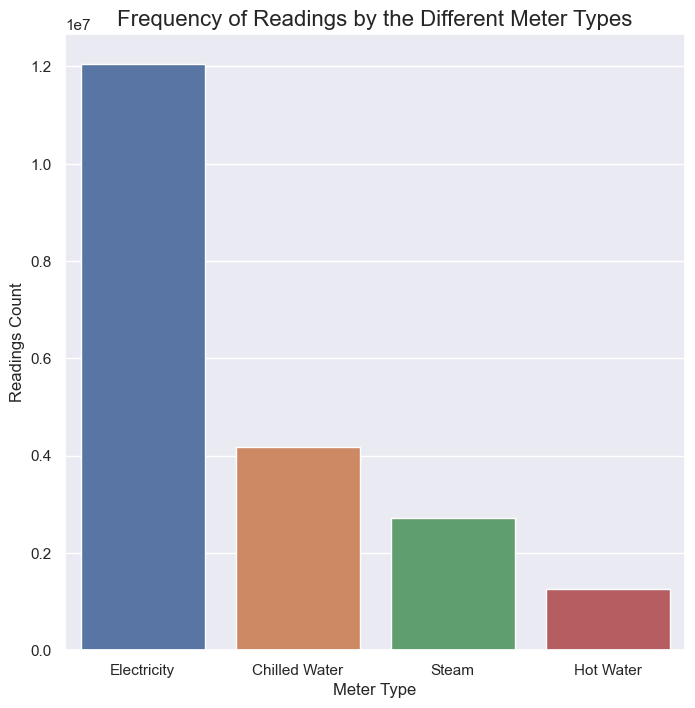

In [30]:
fig, ax = plt.subplots(figsize=(8,8))
meter_types_labels = ['Electricity', 'Chilled Water', 'Steam', 'Hot Water']
sns.countplot(x = 'meter', data = train).set_title("Frequency of Readings by the Different Meter Types", fontsize=16)
ax.set_xticklabels(meter_types_labels)
plt.xlabel('Meter Type', fontsize=12)
plt.ylabel('Readings Count', fontsize=12)
plt.show()

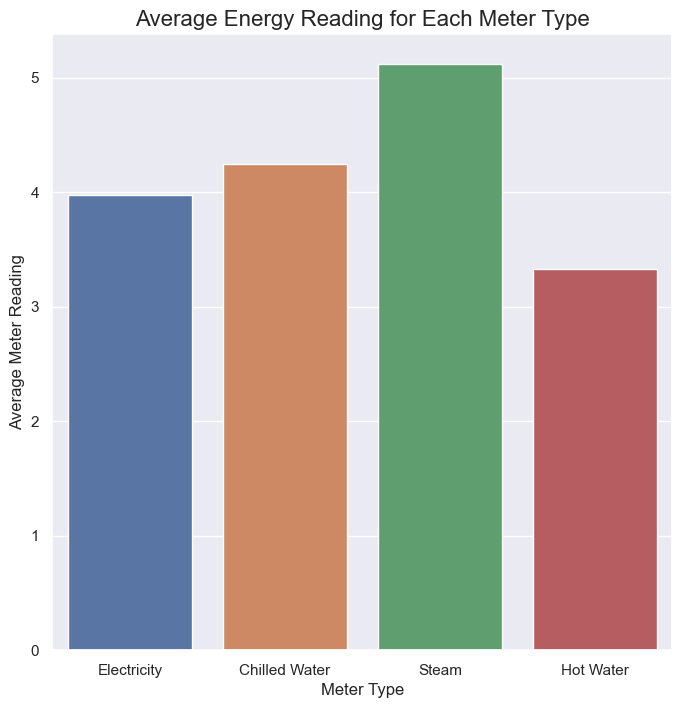

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
meter_types = train.groupby('meter').meter_reading.mean().reset_index()
sns.barplot(x ='meter', y ='meter_reading', data = meter_types).set_title("Average Energy Reading for Each Meter Type", fontsize=16)
ax.set_xticklabels(meter_types_labels)
plt.xlabel('Meter Type', fontsize=12)
plt.ylabel('Average Meter Reading', fontsize=12)
plt.show()

## Feature 2: Primary Use  

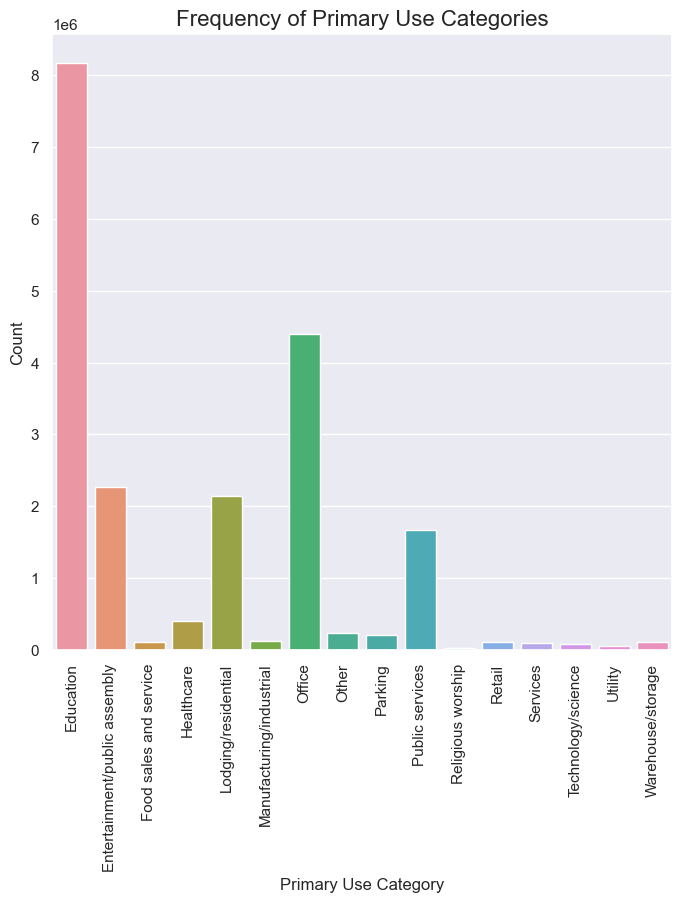

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'primary_use', data = train).set_title("Frequency of Primary Use Categories", fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Primary Use Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

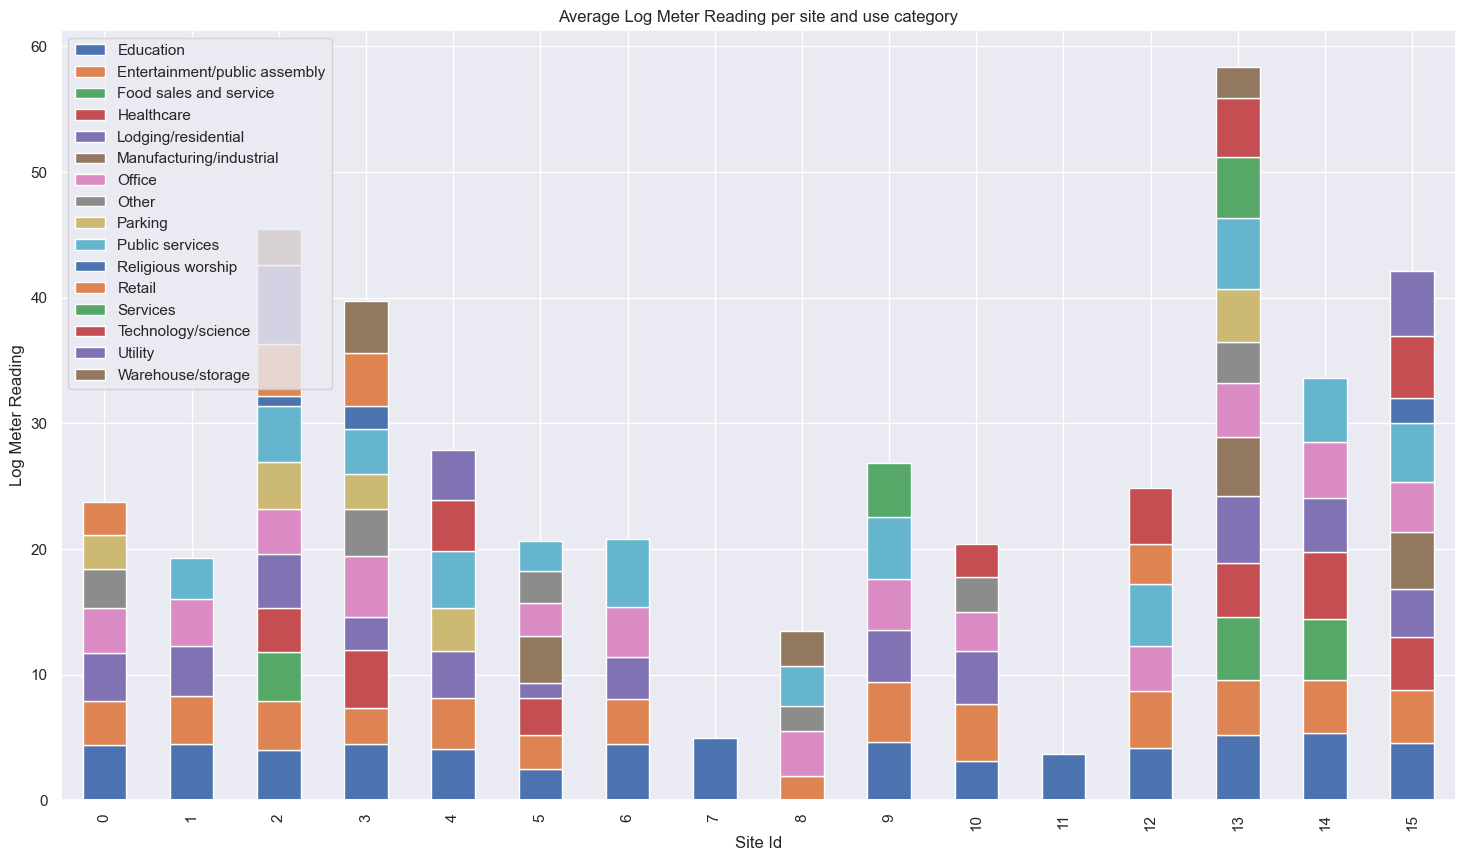

In [33]:
site_use_grouping = train.groupby(['site_id','primary_use'])['meter_reading'].mean().unstack('primary_use')
site_use_grouping.plot(kind = 'bar', stacked = True, figsize=(18,10)).set_title("Average Meter Reading per site and use category")
plt.xlabel('Site Id')
plt.ylabel('Meter Reading')
plt.legend(loc = "upper left")
plt.show()

## Correlation Between the Different Features 

In [38]:
correlation_matrix = train.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_12644\1065578357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


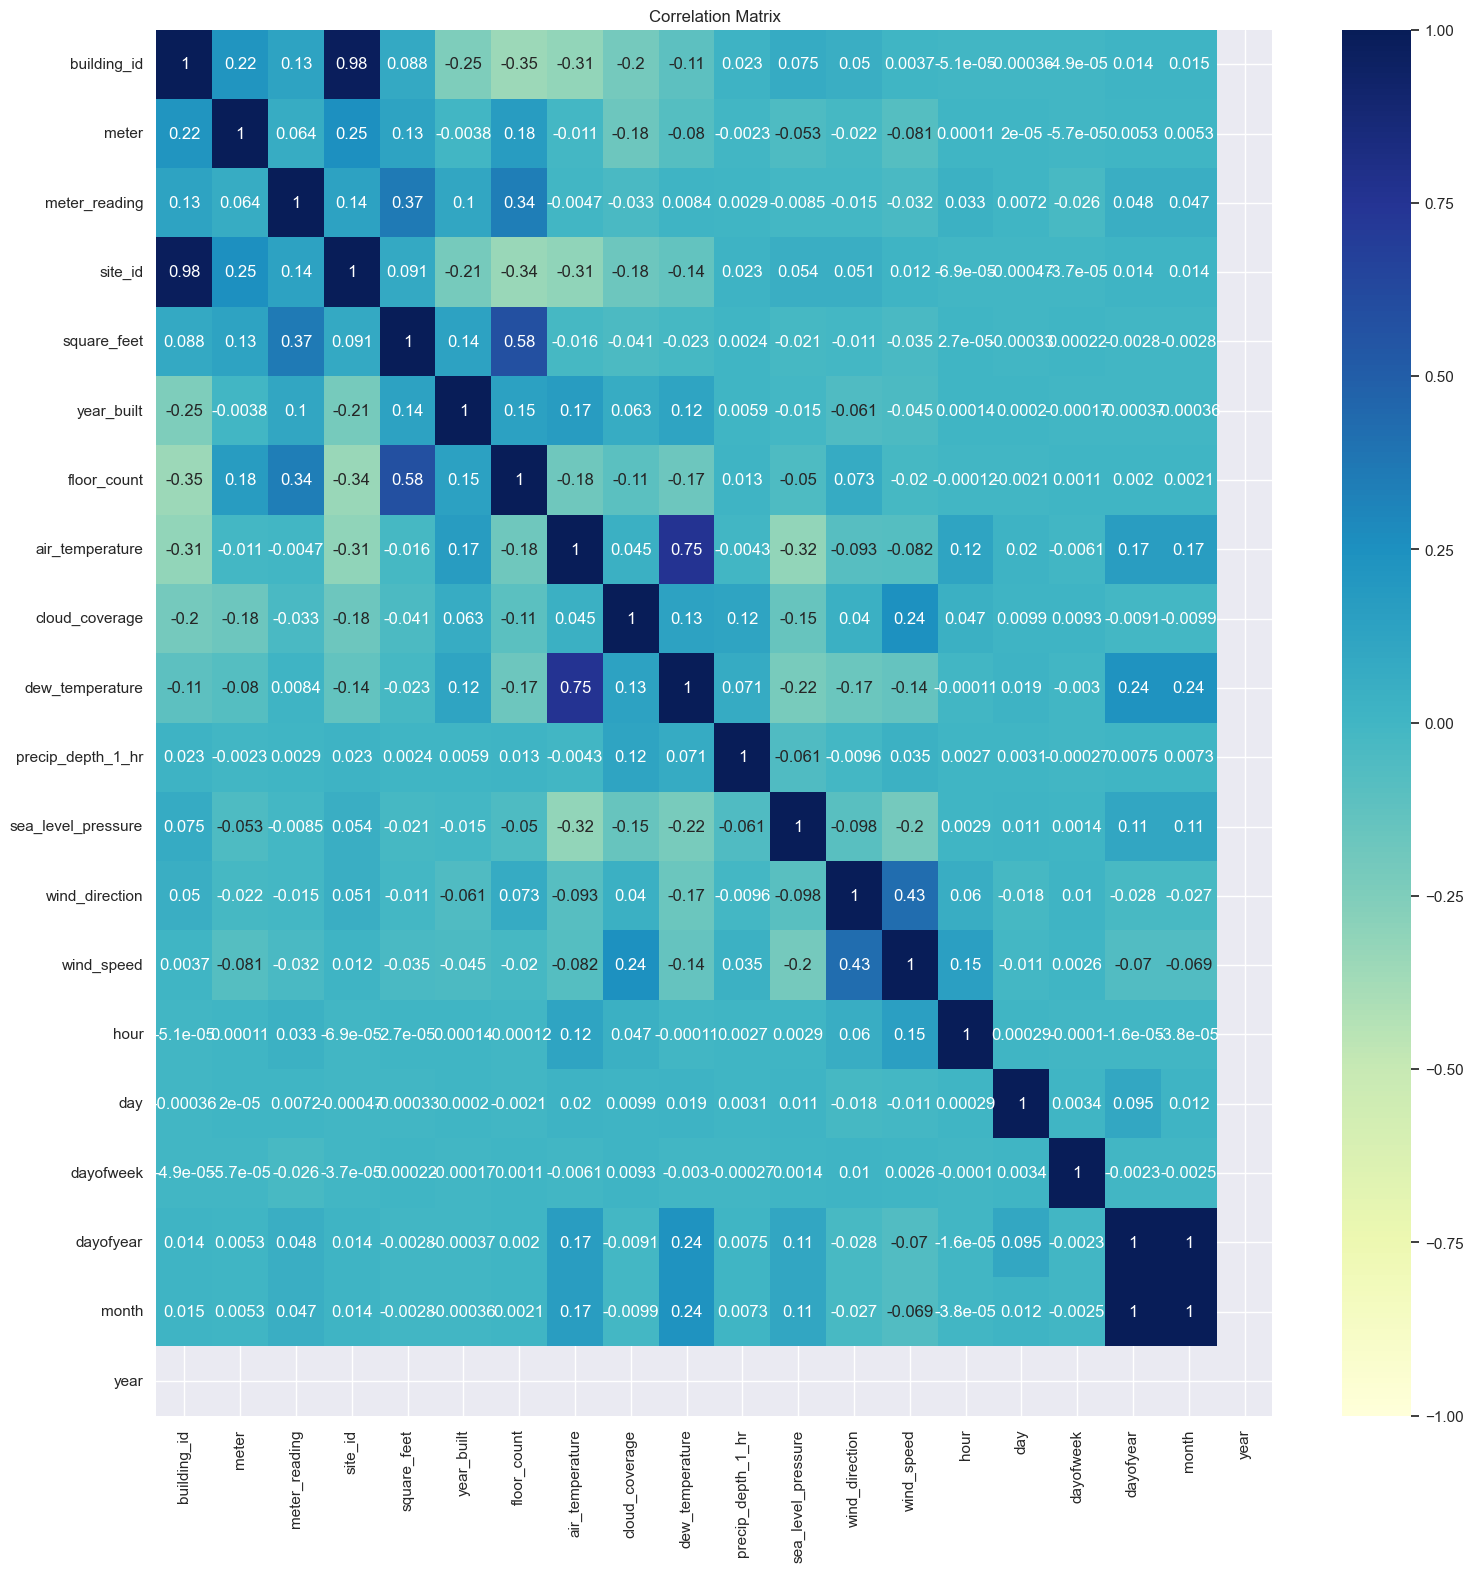

In [39]:
plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [40]:
target_corr_df = pd.DataFrame(correlation_matrix["meter_reading"].sort_values(ascending=False))
target_corr_df 

,meter_reading
meter_reading,1.000000
square_feet,0.366016
floor_count,0.342052
site_id,0.139902
building_id,0.126395
year_built,0.103332
meter,0.064360
dayofyear,0.047776
month,0.047386
hour,0.033277


## Features Histograms

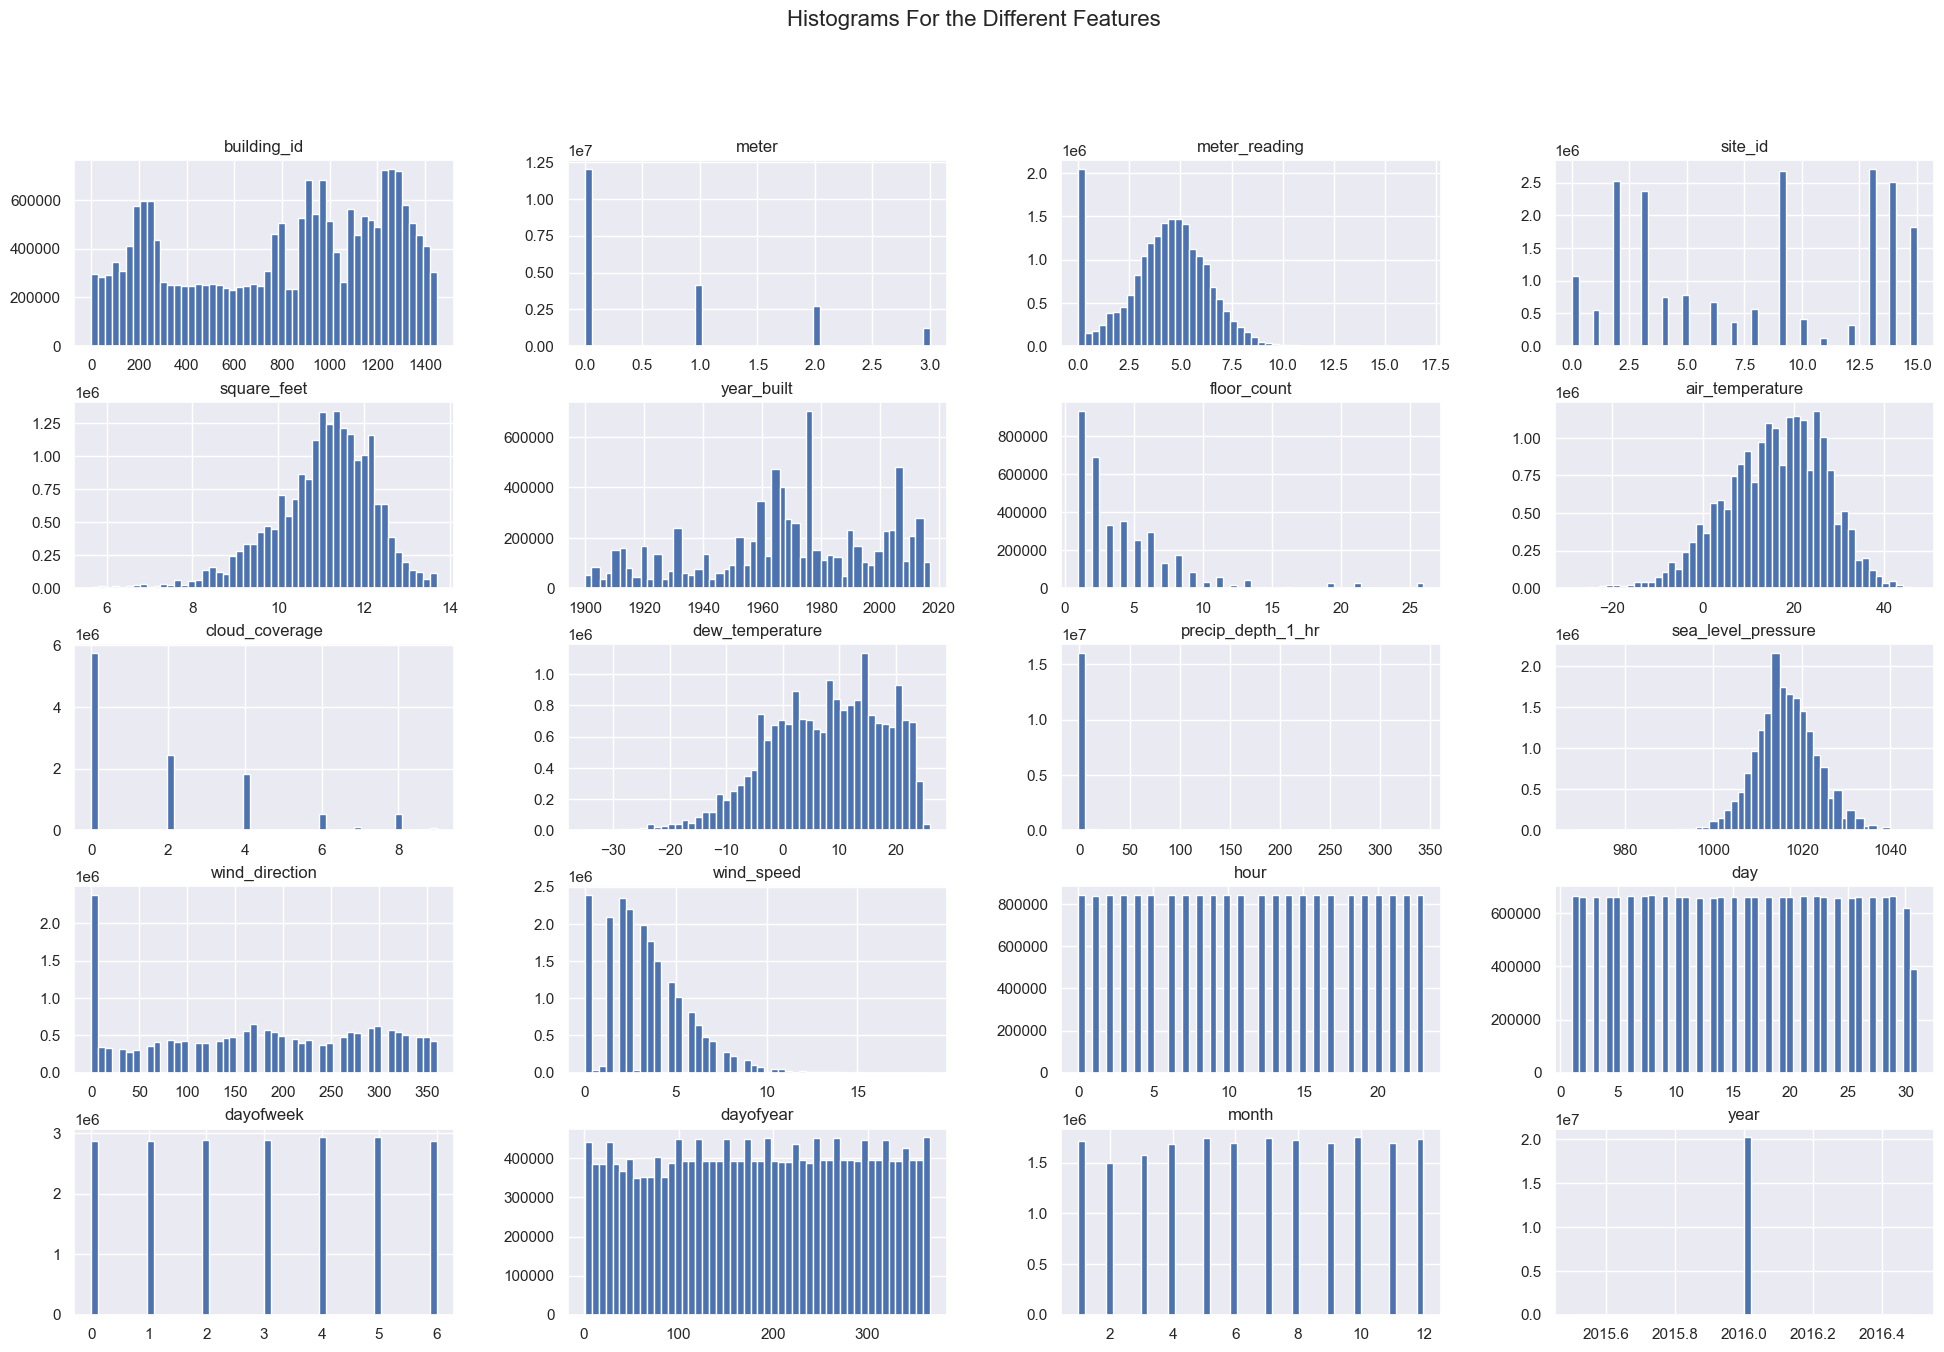

In [44]:
train.hist(bins=50, figsize=(24,15))
plt.suptitle('Histograms For the Different Features', fontsize=16)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12644\3015604217.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['square_feet'], color='purple', ax = ax1)
C:\Users\PC\AppData\Local\Temp\ipykernel_12644\3015604217.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(train['square_feet'

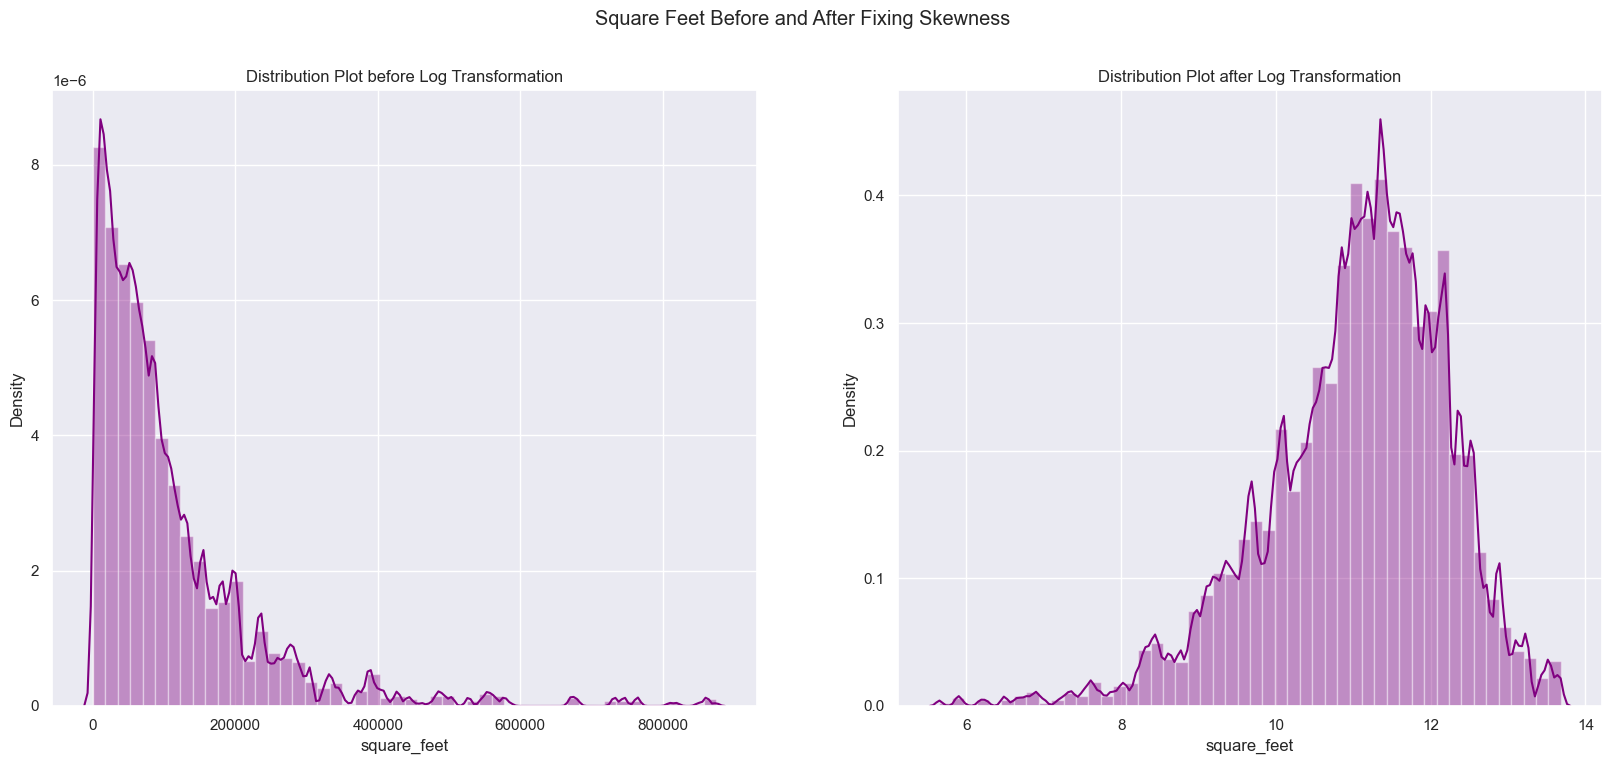

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,8))
fig.suptitle('Square Feet Before and After Fixing Skewness')

sns.distplot(train['square_feet'], color='purple', ax = ax1)
ax1.set_title('Distribution Plot before Log Transformation')

sns.distplot(np.log1p(train['square_feet']), color='purple', ax = ax2)
ax2.set_title('Distribution Plot after Log Transformation')

plt.show()

In [43]:
print('Square Feet skewness before Log Transformation is: ', train['square_feet'].skew())

train['square_feet'] = np.log1p(train['square_feet'])
print('Square Feet skewness after Log Transformation is: ', train['square_feet'].skew())

Square Feet skewness before Log Transformation is:  2.6664165857123243
Square Feet skewness after Log Transformation is:  -0.7811655719213683
